In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, quarter, dayofmonth, day
from pyspark import *
from pyspark.sql.functions import to_timestamp,date_format
from pyspark.sql.functions import col
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sparkSession = SparkSession.builder.appName("example").getOrCreate()

23/12/18 00:41:38 WARN Utils: Your hostname, vinh-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.17.130 instead (on interface ens33)
23/12/18 00:41:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/18 00:41:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = sparkSession.read.csv('hdfs://localhost:9000/AAPL.csv', header = True, inferSchema=True)

In [4]:
df.show(5)

+----------+--------+--------+--------+--------+---------+---------+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+----------+--------+--------+--------+--------+---------+---------+
|1980-12-15| 0.12221| 0.12221|0.121652|0.121652| 0.094137|175884800|
|1980-12-16|0.113281|0.113281|0.112723|0.112723| 0.087228|105728000|
|1980-12-17|0.115513|0.116071|0.115513|0.115513| 0.089387| 86441600|
|1980-12-18|0.118862| 0.11942|0.118862|0.118862| 0.091978| 73449600|
|1980-12-19|0.126116|0.126674|0.126116|0.126116| 0.097591| 48630400|
+----------+--------+--------+--------+--------+---------+---------+
only showing top 5 rows



In [7]:
df.cache()

DataFrame[Date: date, Open: double, High: double, Low: double, Close: double, Adj Close: double, Volume: bigint]

In [5]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [6]:
df.summary().show()

23/12/18 00:43:45 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+-----------------+------------------+--------------------+
|summary|              Open|              High|               Low|            Close|         Adj Close|              Volume|
+-------+------------------+------------------+------------------+-----------------+------------------+--------------------+
|  count|             10810|             10810|             10810|            10810|             10810|               10810|
|   mean|19.402891170767823|19.618382993339516|19.195265835800196|19.41496805809435| 18.66154135948198|3.2251468589269197E8|
| stddev|  40.6721137660574| 41.13471793006043| 40.23993756411423|40.70556786689262|40.285107064757085| 3.366116127692161E8|
|    min|          0.049665|          0.049665|          0.049107|         0.049107|             0.038|                   0|
|    25%|          0.293527|          0.301339|          0.285714|         0.294643|          0.240803|           116984000|


In [7]:
df = df.withColumn('Volume', col('Volume')/1000000)
df.show(5)

+----------+--------+--------+--------+--------+---------+--------+
|      Date|    Open|    High|     Low|   Close|Adj Close|  Volume|
+----------+--------+--------+--------+--------+---------+--------+
|1980-12-15| 0.12221| 0.12221|0.121652|0.121652| 0.094137|175.8848|
|1980-12-16|0.113281|0.113281|0.112723|0.112723| 0.087228| 105.728|
|1980-12-17|0.115513|0.116071|0.115513|0.115513| 0.089387| 86.4416|
|1980-12-18|0.118862| 0.11942|0.118862|0.118862| 0.091978| 73.4496|
|1980-12-19|0.126116|0.126674|0.126116|0.126116| 0.097591| 48.6304|
+----------+--------+--------+--------+--------+---------+--------+
only showing top 5 rows



In [8]:
df = df.withColumn('Year', year(df.Date))
df = df.withColumn('Month', month(df.Date))
df = df.withColumn('Day', day(df.Date))
df = df.withColumn('Quarter', quarter(df.Date))
# df = df.withColumn("Date",to_timestamp(col("Date"))).withColumn("Year", date_format(col("Date"), "y"))
# df = df.withColumn("Date",to_timestamp(col("Date"))).withColumn("Month", date_format(col("Date"), "m"))
# df = df.withColumn("Date",to_timestamp(col("Date"))).withColumn("Quarter", date_format(col("Date"), "q"))
# df = df.withColumn("Date",to_timestamp(col("Date"))).withColumn("Day", date_format(col("Date"), "d"))
df.show()

+----------+--------+--------+--------+--------+---------+--------+----+-----+---+-------+
|      Date|    Open|    High|     Low|   Close|Adj Close|  Volume|Year|Month|Day|Quarter|
+----------+--------+--------+--------+--------+---------+--------+----+-----+---+-------+
|1980-12-15| 0.12221| 0.12221|0.121652|0.121652| 0.094137|175.8848|1980|   12| 15|      4|
|1980-12-16|0.113281|0.113281|0.112723|0.112723| 0.087228| 105.728|1980|   12| 16|      4|
|1980-12-17|0.115513|0.116071|0.115513|0.115513| 0.089387| 86.4416|1980|   12| 17|      4|
|1980-12-18|0.118862| 0.11942|0.118862|0.118862| 0.091978| 73.4496|1980|   12| 18|      4|
|1980-12-19|0.126116|0.126674|0.126116|0.126116| 0.097591| 48.6304|1980|   12| 19|      4|
|1980-12-22|0.132254|0.132813|0.132254|0.132254| 0.102341| 37.3632|1980|   12| 22|      4|
|1980-12-23|0.137835|0.138393|0.137835|0.137835|  0.10666| 46.9504|1980|   12| 23|      4|
|1980-12-24|0.145089|0.145647|0.145089|0.145089| 0.112273| 48.0032|1980|   12| 24|      4|

<Axes: xlabel='Date'>

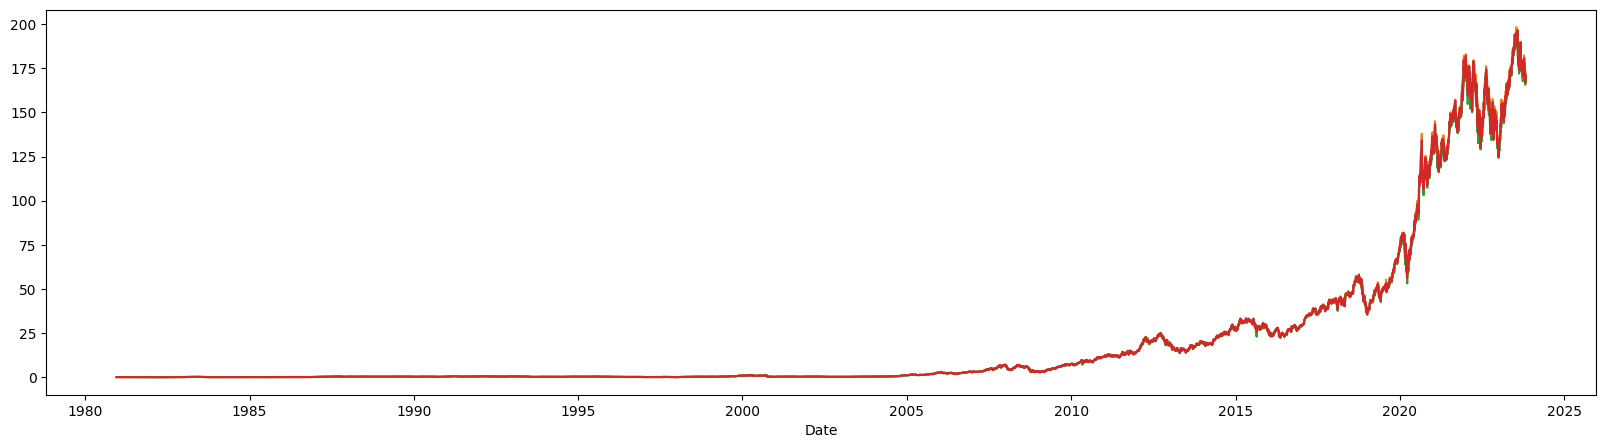

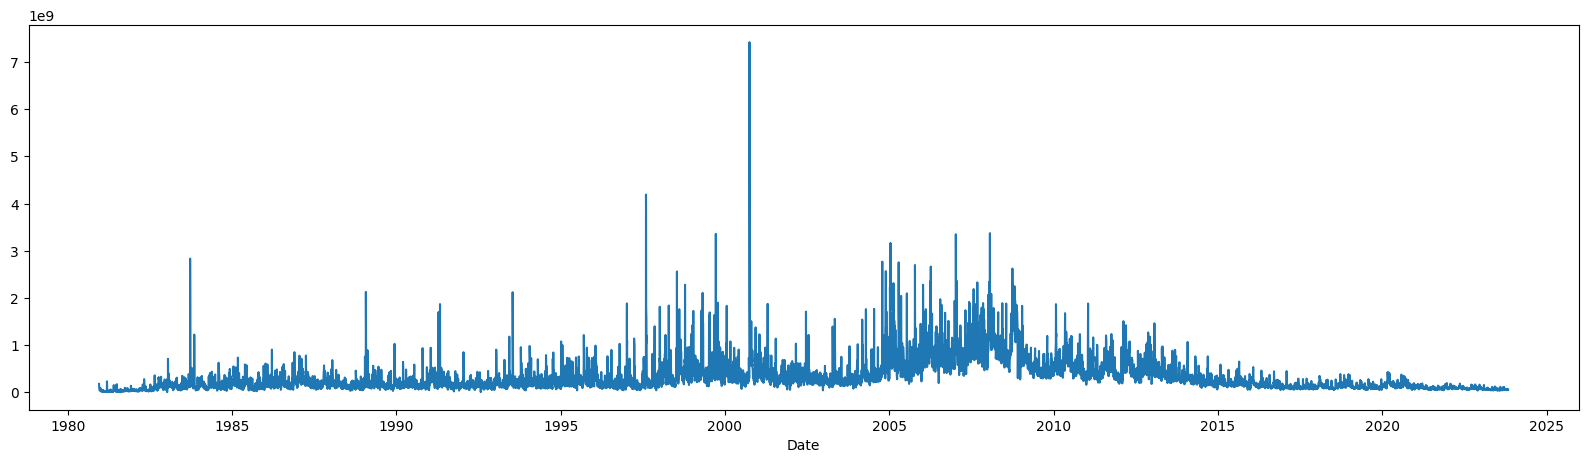

In [10]:
df.toPandas() \
    .plot('Date', ['Open', 'High', 'Low', 'Close'], legend=False, figsize = (20, 5))
df.toPandas() \
    .plot('Date', 'Volume', legend=False, figsize = (20, 5))

<Axes: xlabel='Year'>

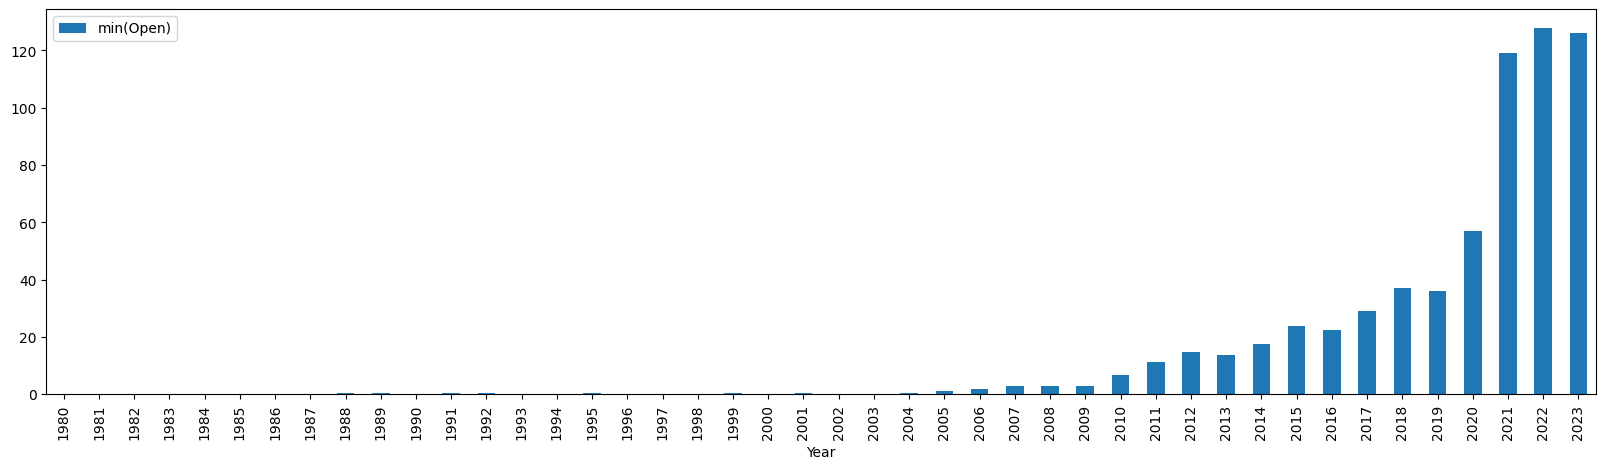

In [11]:
df.groupBy('Year') \
    .min('Open') \
    .toPandas() \
    .sort_values(by='Year') \
    .plot('Year',['min({})'.format('Open')], figsize = (20, 5), kind = 'bar')

<Axes: xlabel='Year'>

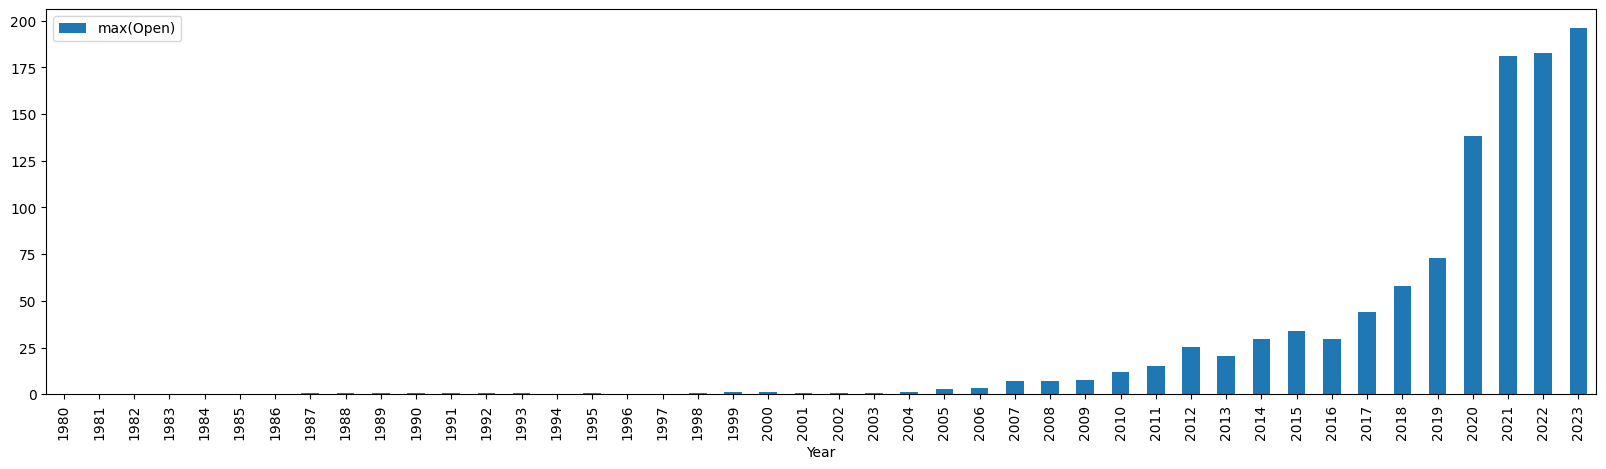

In [12]:
df.groupBy('Year') \
    .max('Open') \
    .toPandas() \
    .sort_values(by='Year') \
    .plot('Year',['max({})'.format('Open')], figsize = (20, 5), kind = 'bar')

<Axes: xlabel='Year'>

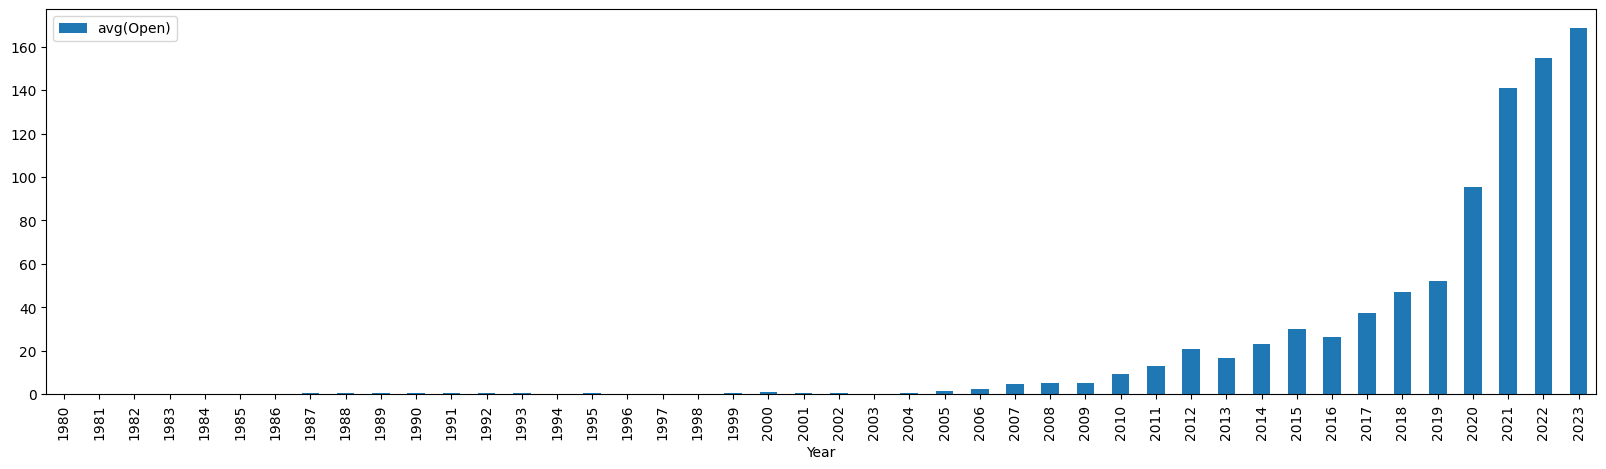

In [14]:
df.groupBy('Year') \
    .mean('Open') \
    .toPandas() \
    .sort_values(by='Year') \
    .plot('Year',['avg({})'.format('Open')], figsize = (20, 5), kind = 'bar')

In [16]:
def barplot(df, x, y, measure):
    if measure == 'mean':
        pd_df = df.groupBy(x).mean(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'avg({})'.format(y), legend=False, figsize = (20, 5), kind = 'bar')
    elif measure == 'min':
        pd_df = df.groupBy(x).min(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'min({})'.format(y), legend=False, figsize = (20, 5), kind = 'bar')
    elif measure == 'max':
        pd_df = df.groupBy(x).max(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'max({})'.format(y), legend=False, figsize = (20, 5), kind = 'bar')
    plt.ylabel(y)
    plt.show()

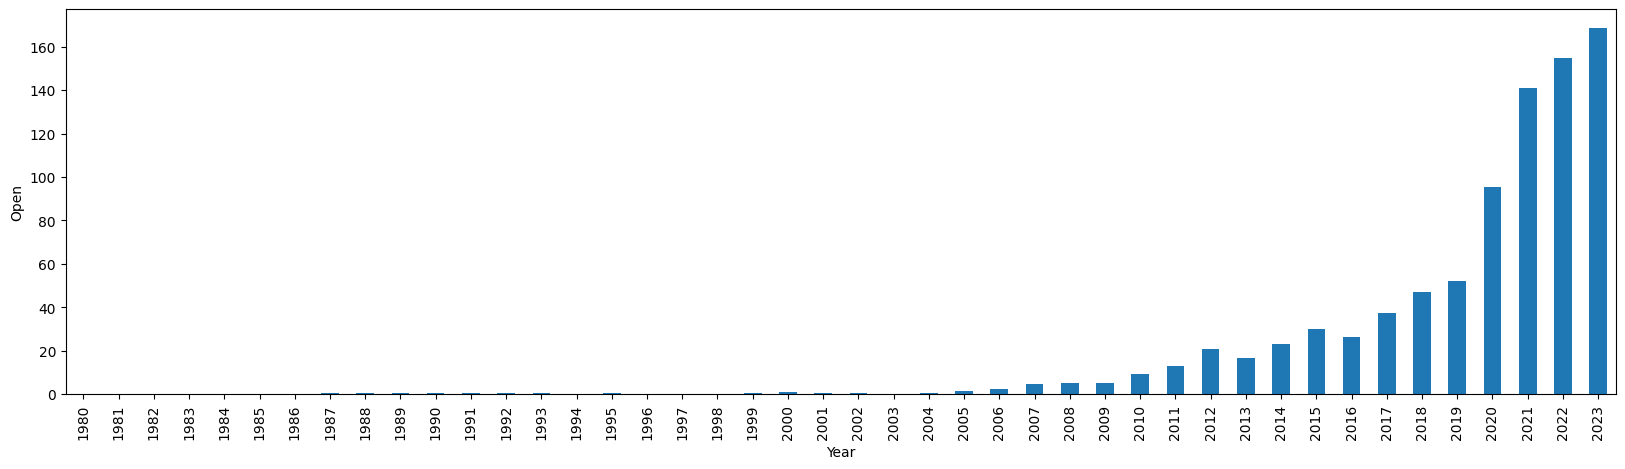

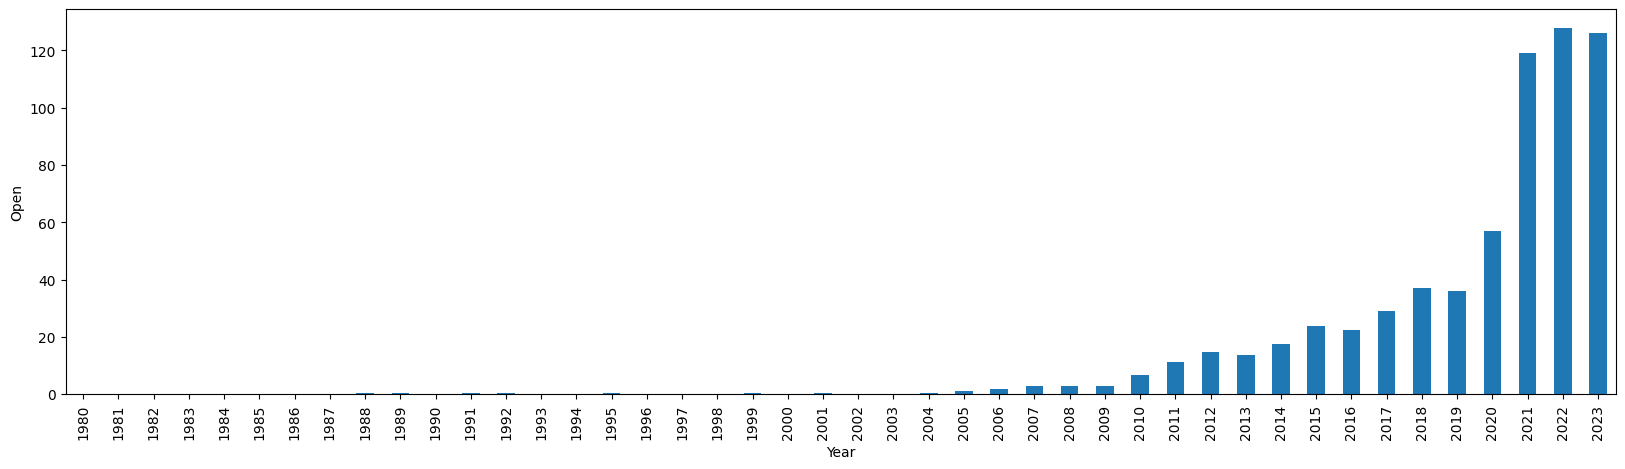

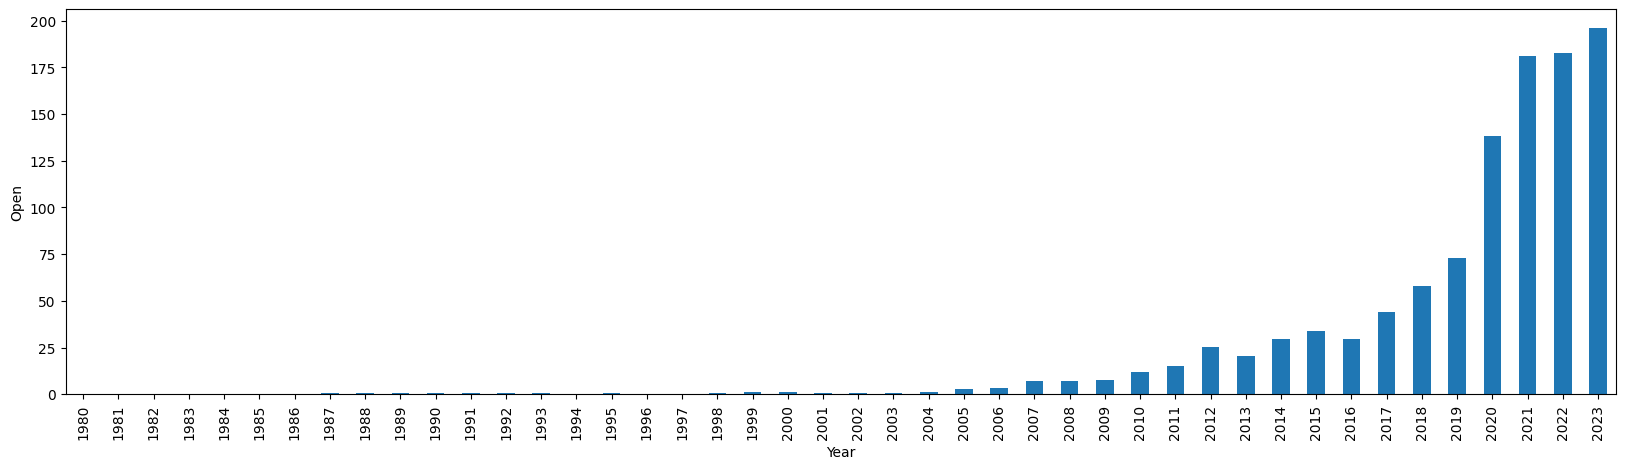

In [31]:
barplot(df, 'Year', 'Open', 'mean')
barplot(df, 'Year', 'Open', 'min')
barplot(df, 'Year', 'Open', 'max')

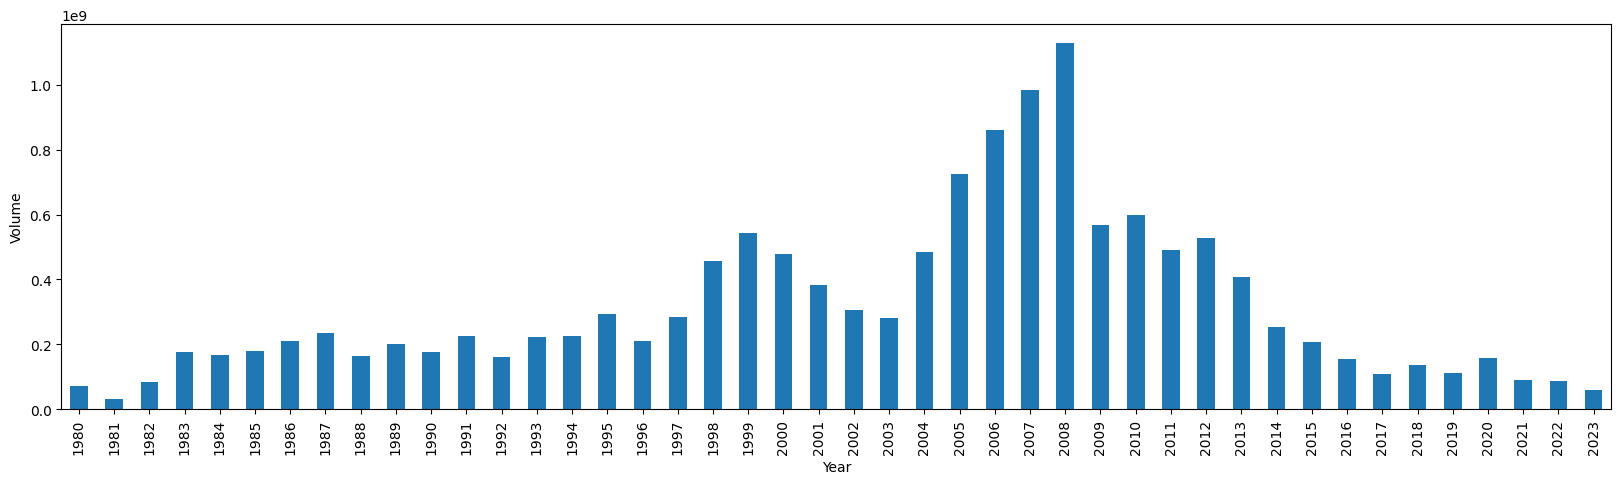

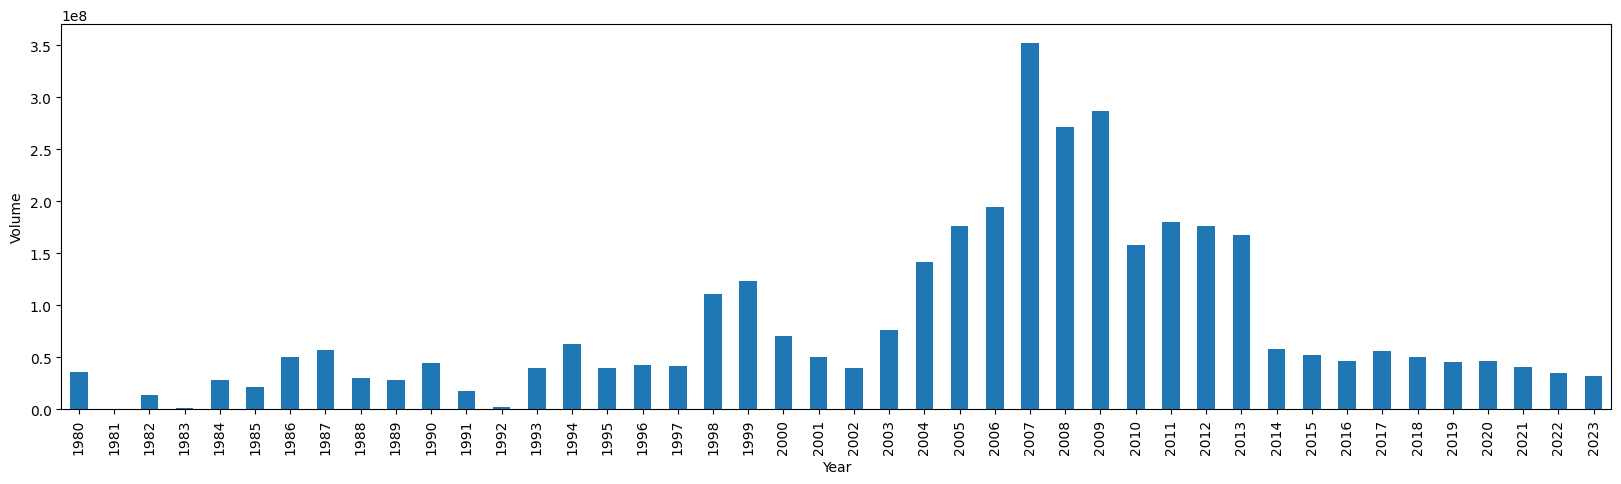

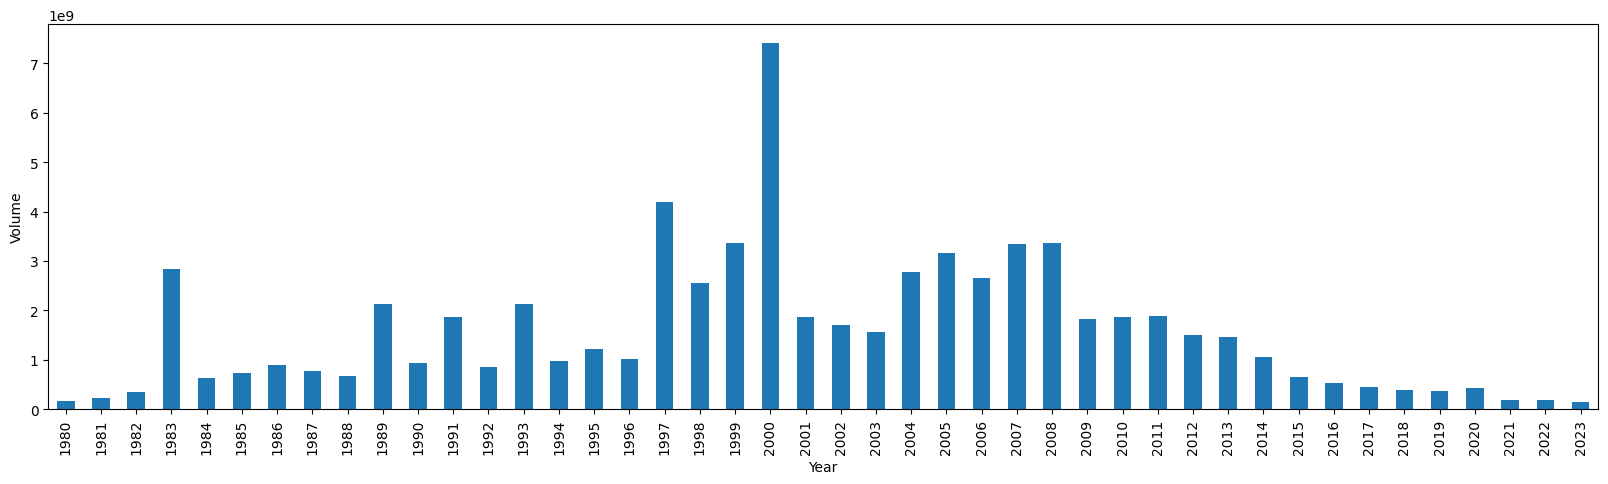

In [30]:
barplot(df, 'Year', 'Volume', 'mean')
barplot(df, 'Year', 'Volume', 'min')
barplot(df, 'Year', 'Volume', 'max')

<Axes: xlabel='Year'>

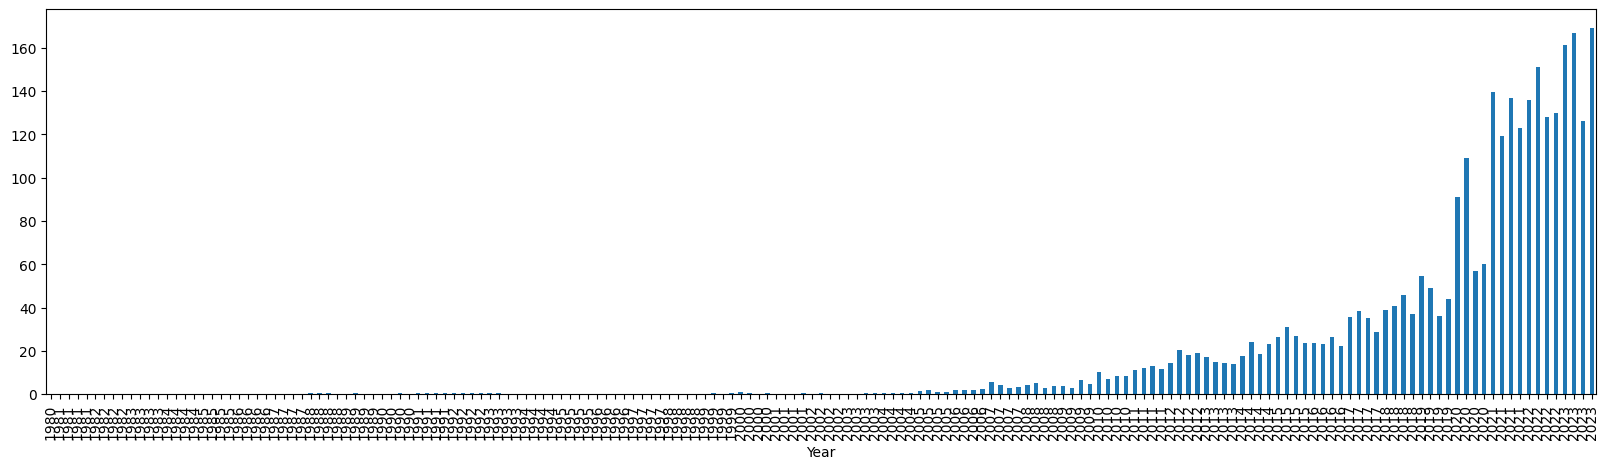

In [23]:
df.select('*') \
    .where('Year between 1980 and 2024') \
    .groupBy('Quarter', 'Year') \
    .min('Open') \
    .toPandas() \
    .sort_values(by='Year') \
    .plot('Year', 'min({})'.format('Open'), legend=False, figsize = (20, 5), kind = 'bar')

<Axes: xlabel='Date'>

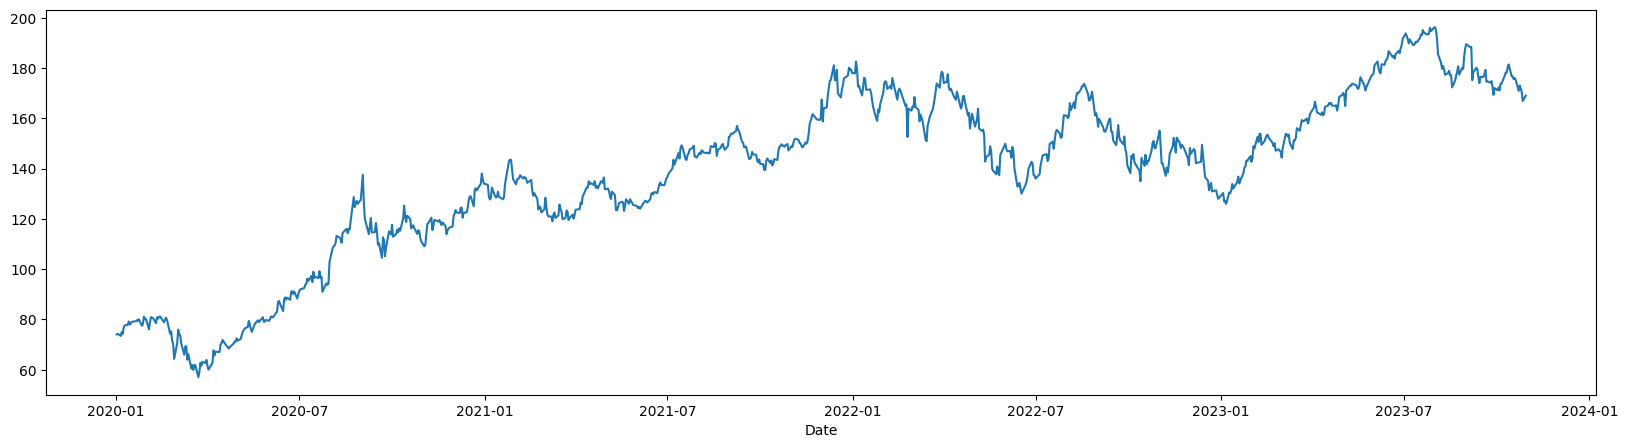

In [32]:
df.select('*') \
    .where('Year <= 2023 and Year >= 2020') \
    .toPandas() \
    .plot('Date', 'Open', legend=False, figsize = (20, 5))

<Axes: xlabel='Date'>

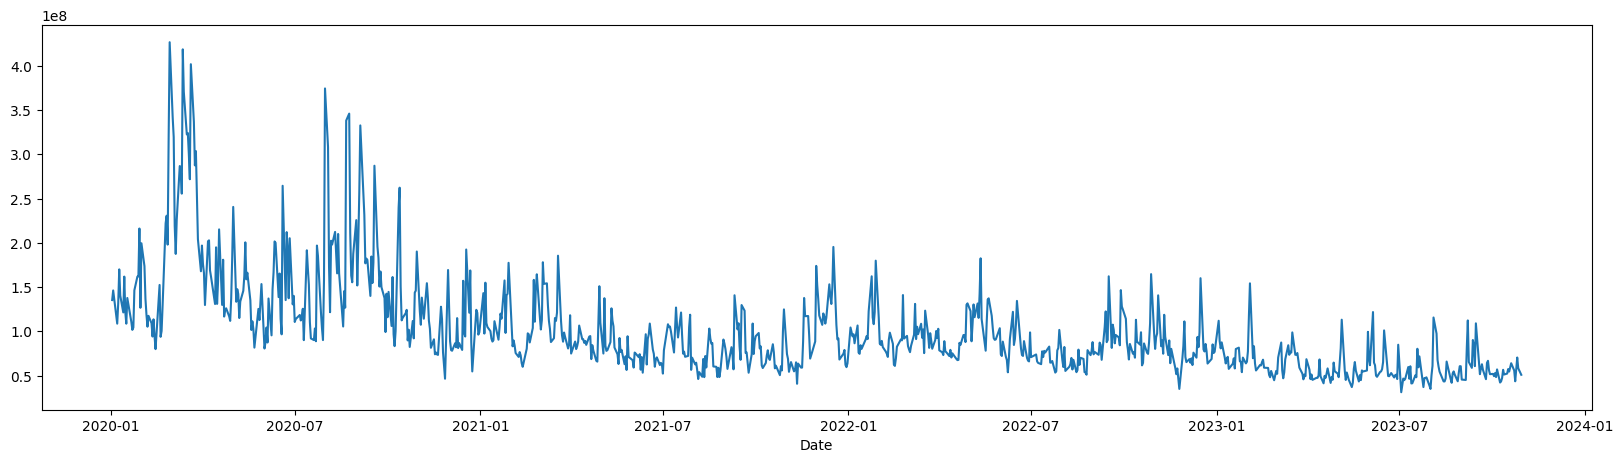

In [33]:
df.select('*') \
    .where('Year <= 2023 and Year >= 2020') \
    .toPandas() \
    .plot('Date', 'Volume', legend=False, figsize = (20, 5))